# Week 13 - Bivariate Analysis 2 - Statistics

# 

# 1. Lesson

We are going to consider some statistical tests that you can apply to your data.

### T-tests

You can use a t-test to discern whether the means of two sets of numbers might be the same.  The t-test is useful for data that are normally distributed.  The data should also have approximately equal variances.  Of course you can run a t-test for data that don't fit these criteria, but the less well it fits, the more likely that the t-test will give the wrong result.

First, here is a one-sample t-test to see if you have made a correct guess about the underlying mean:

In [1]:
from scipy import stats
import numpy as np
np.random.seed(0)
arr1 = np.random.normal(loc = 0, size = 1000)
t_stat, p_value = stats.ttest_1samp(arr1, 0)
# The array might have a mean of 0; p > 0.05.  In fact, it does have a mean of 0.
print(p_value)

0.14759031545459375


In [2]:
# The array probably does not have a mean of 0.1; p < 0.05.  In fact, it doesn't.
t_stat, p_value = stats.ttest_1samp(arr1, 0.1)
print(p_value)

3.738968246353356e-06


In [3]:
arr2 = np.random.normal(loc = 0, size = 10)
t_stat, p_value = stats.ttest_1samp(arr2, 0.1)
# This array might have a mean of 0.1; p > 0.05.  In fact, it doesn't - but since there are only ten samples, we can't tell that
print(p_value)

0.8283790364046455


In [4]:
arr3 = np.random.normal(loc = 0.1, size = 1000)
t_stat, p_value = stats.ttest_ind(arr1, arr3)
# The two arrays probably have different means; p < 0.05.  In fact, they do have different means; 0 and 0.1
print(p_value)

0.0004525039970281393


### Mann-Whitney U-test

This test is used to determine whether two sets of numbers might come from the same distribution - but without making any assumptions about the data being normally distributed.

In [5]:
u_value, p_value = stats.mannwhitneyu(arr1, arr3)
# The two arrays probably come from different distributions.  In fact, they do; one comes from mean = 0, one mean = 1.
print(p_value)

0.0006158714688322862


In [6]:
np.random.seed(0)
arr4 = np.concatenate([np.zeros(10) + 0.01, np.array([1])])
arr5 = np.concatenate([np.zeros(10) - 0.01, np.array([-1])])
t_stat, p_value = stats.ttest_ind(arr4, arr5)
# Here is an example where the t-test fails due to the non-normality of the data.  The data do come from different 
# distributions with different means, but the t-test fails to detect it.
print(p_value)

0.13178840154670063


In [7]:
u_value, p_value = stats.mannwhitneyu(arr4, arr5)
# The two arrays probably come from different distributions.  In fact, they do; see above.
# It is unusual for the t-test to fail due to non-normality but the Mann-Whitney U-test to succeed, but it can happen as in this case.
print(p_value)

1.2550539978736685e-05


### ANOVA: categorical data plotted vs. continous data

ANOVA is a t-test generalized to more than two groups

In [8]:
np.random.seed(0)
arr6 = np.random.normal(loc = 0, size = 1000)
arr7 = np.random.normal(loc = 0.1, size = 1000)
arr8 = np.random.normal(loc = 0.2, size = 1000)
result = stats.f_oneway(arr1, arr3, arr6)
# The three arrays probably have different means; p < 0.05.  In fact, as you can see, they do have different means.
print(result.pvalue)

0.00028601982658831227


### Chi-square: categorical data plotted vs. categorical data

Chi-square will test for statistical independence between counts for two categorical features.  To do this, it requires a matrix of numbers: one feature corresponds to the row and one to the column.  The numbers must be counts.  Thus, if the category for the column is weather (cloudy or sunny) and the category for the row is temperature (low, medium, or high), then the count of days in the month at that temperature and weather would be a good variable for chi-square.

In [9]:
arr9 = np.array([[10, 0], [5, 5], [0, 10]])
result = stats.chi2_contingency(arr9)
# Different rows are very different.  Each row is _not_ a fixed multiple of each other, so the variables are not independent.
# Thus, the chi-squared test shows that the data are not independent.  
# In the next example, we will elaborate on what kind of difference is involved
print(result.pvalue)

4.539992976248486e-05


The specific goal of the chi-squared contingency table test is to find out whether the table possesses statistical independence - which is to say, it asks whether each number can be written as a product of two other numbers: one for its row and one for its column.  For example, suppose two stores, A and B, sell two kinds of apples, red and green.  If the number of apples sold is independent, it would mean that we can multiply to get the number sold.  That is, the fraction of the apples that are red and sold at store A would approximately equal the fraction red multiplied by the fraction sold at store A.

In [10]:
A_B_values = np.array([0.4, 0.6])
red_green_values = np.array([0.7, 0.3])
outer_product = 50 * np.outer(A_B_values, red_green_values)
print(outer_product)

[[14.  6.]
 [21.  9.]]


The chi-squared test returns a null result due to the complete independence of the values.  (p > 0.05).  Each row is precisely a fixed multiple of the other.  As above, a low p-value means dependence and a high p-value means independence.

In [11]:
result = stats.chi2_contingency(outer_product)
print(result.pvalue)

1.0


In [12]:
arr9 = np.array([[10, 0], [9, 1], [8, 2]])
result = stats.chi2_contingency(arr9)
# Here, the first columns (10, 9, 8) is quite different in its ratios compared with the second (0, 1, 2)
# However, because the second column has low counts, it is conceivable that these ratios could not be the true ratios.
# This means that perhaps the variables are independent after all, leading to a relatively high p-value - we cannot say for
# sure that the data are not independent.  We'd need more data to say that.
print(result.pvalue)

0.3291929878079054


In [13]:
result = stats.chi2_contingency(arr9 * 3)
# If we have a lot more data, even with the exact same ratios between the rows, we become more certain that the data are not independent
print(arr9 * 3)
print(result.pvalue)

[[30  0]
 [27  3]
 [24  6]]
0.035673993347252395


# 2. Weekly graph question

Which of the following graph color schemes would you choose, and why?

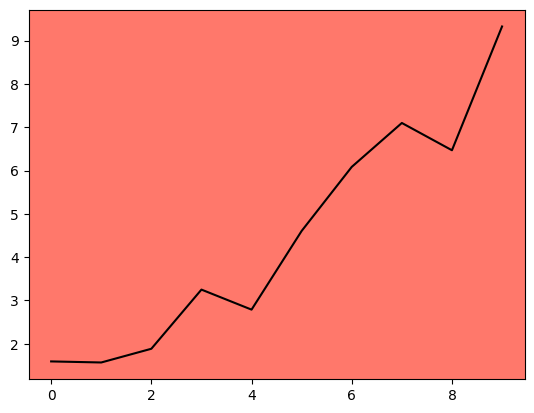

In [14]:
import matplotlib.pyplot as plt
arr10 = np.arange(10)
arr11 = np.random.normal(size = 10) + np.arange(10)
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1.0, 0.47, 0.42))

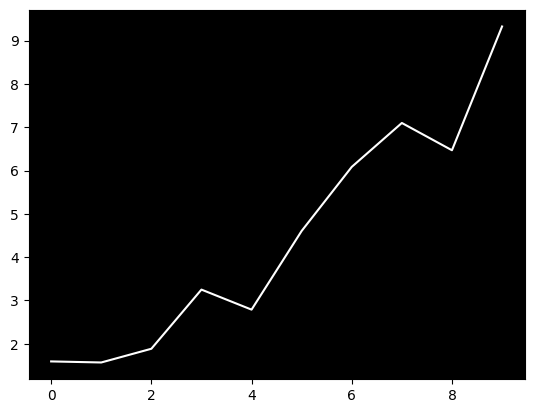

In [15]:
fig = plt.plot(arr10, arr11, c = "white")
ax = plt.gca()
ax.set_facecolor((0, 0, 0))

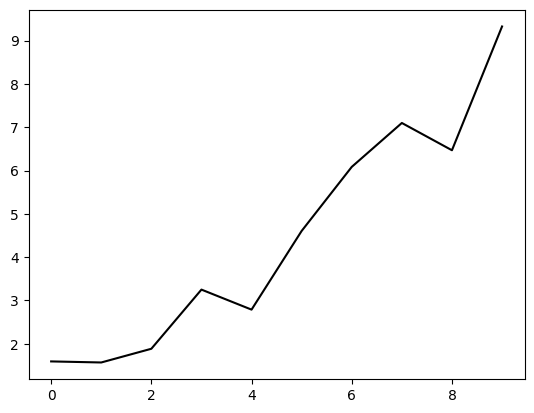

In [16]:
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1, 1, 1))

In [17]:
# I would chose the last graph - black line with the white background 
# Clear, easy to understand 
# Highest readability in reports
# Not being distracted by the background 

# 3. Homework

* Create a dataset showing flowers that have been fertilized with two brands of fertilizer.  The data show the heights of the flowers.  One fertilizer is better than the other, leading to taller flowers - but only slightly taller.
* The flowers have some height distribution that is _not_ normal.
* Use a t-test and a Mann-Whitney U test to determine whether the flowers have the same height.  (In this case, try the t-test even though the distribution it not normal.  However, that is not always a good idea!)
* Actually, create two datasets: one where the t-test works (and detects the slight height difference) and one where the t-test fails.
* Draw a box and whisker plot or histogram showing the distribution of the flower heights in each case.  Can you see the difference?
* Next, create a dataset showing five different brands of fertilizer, leading to five somewhat different height distributions.  Use an ANOVA test to detect the height differences.  Does the ANOVA test work?
* Finally, create a dataset showing the heights of four different flower types for each of the five brand of fertilizers (one height for each pair, so 4 x 5 = 20 heights).  Use a chi squared test to check whether the five different fertilizers lead to different flower heights.

Case 1: Slight Difference Detected
T-test p-value: 0.26352095359927863
Mann-Whitney p-value: 0.04447899727755185


/tmp/ipykernel_5334/1263377500.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fert_a, fert_b], labels=["Fertilizer A", "Fertilizer B"])


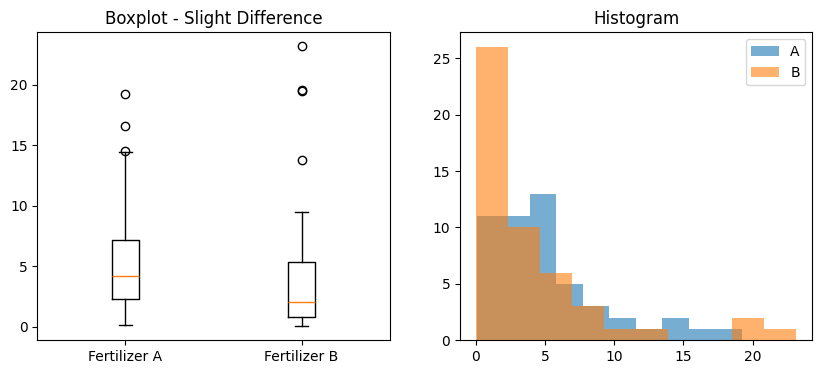


Case 2: T-test Fails
T-test p-value: 0.6994021849936315
Mann-Whitney p-value: 0.5058882913243417


/tmp/ipykernel_5334/1263377500.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fert_a2, fert_b2], labels=["Fertilizer A", "Fertilizer B"])


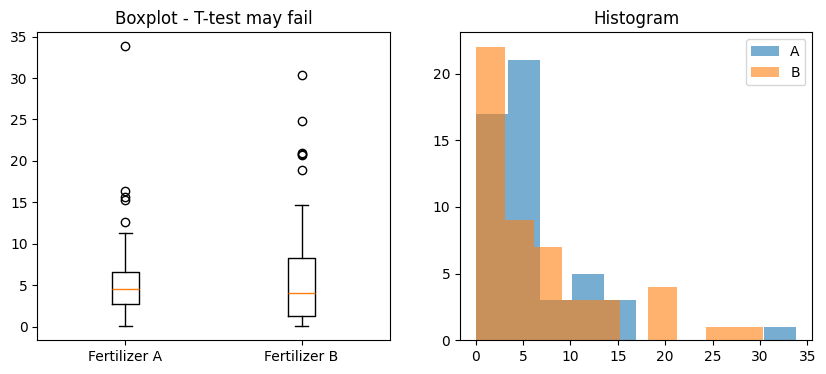


Five Fertilizers - ANOVA p-value: 0.26731890470022673


/tmp/ipykernel_5334/1263377500.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fertilizers, labels=[f'F{i+1}' for i in range(5)])


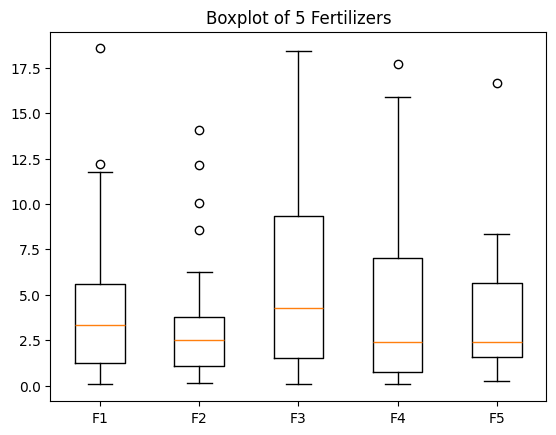


Chi-Squared Test for 4x5 Table
Observed Table:
 [[ 6 17 16 14  7]
 [18 14  9 14 18]
 [16  6  8  7  9]
 [18 14 12  9 14]]
Chi2 p-value: 0.08294810585496928


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, chi2_contingency

np.random.seed(0)


fert_a = np.random.exponential(scale=5, size=50)
fert_b = np.random.exponential(scale=5.2, size=50)  


t_stat, t_p = ttest_ind(fert_a, fert_b)
mw_stat, mw_p = mannwhitneyu(fert_a, fert_b)

print("Case 1: Slight Difference Detected")
print("T-test p-value:", t_p)
print("Mann-Whitney p-value:", mw_p)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot([fert_a, fert_b], labels=["Fertilizer A", "Fertilizer B"])
plt.title("Boxplot - Slight Difference")
plt.subplot(1,2,2)
plt.hist(fert_a, alpha=0.6, label='A')
plt.hist(fert_b, alpha=0.6, label='B')
plt.title("Histogram")
plt.legend()
plt.show()



fert_a2 = np.random.exponential(scale=5, size=50)
fert_b2 = np.random.exponential(scale=5.1, size=50)
fert_b2[0:5] += 20 

t_stat2, t_p2 = ttest_ind(fert_a2, fert_b2)
mw_stat2, mw_p2 = mannwhitneyu(fert_a2, fert_b2)

print("\nCase 2: T-test Fails")
print("T-test p-value:", t_p2)
print("Mann-Whitney p-value:", mw_p2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot([fert_a2, fert_b2], labels=["Fertilizer A", "Fertilizer B"])
plt.title("Boxplot - T-test may fail")
plt.subplot(1,2,2)
plt.hist(fert_a2, alpha=0.6, label='A')
plt.hist(fert_b2, alpha=0.6, label='B')
plt.title("Histogram")
plt.legend()
plt.show()



fertilizers = [np.random.exponential(scale=4+i*0.3, size=30) for i in range(5)]
anova_stat, anova_p = f_oneway(*fertilizers)
print("\nFive Fertilizers - ANOVA p-value:", anova_p)

plt.boxplot(fertilizers, labels=[f'F{i+1}' for i in range(5)])
plt.title("Boxplot of 5 Fertilizers")
plt.show()


heights_matrix = np.random.randint(5, 20, size=(4,5))
chi2_stat, chi2_p, _, _ = chi2_contingency(heights_matrix)

print("\nChi-Squared Test for 4x5 Table")
print("Observed Table:\n", heights_matrix)
print("Chi2 p-value:", chi2_p)

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter nine, stopping before case study 4 (p. 206-227) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_5334/3070740951.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2013-09", periods=26, freq='M')


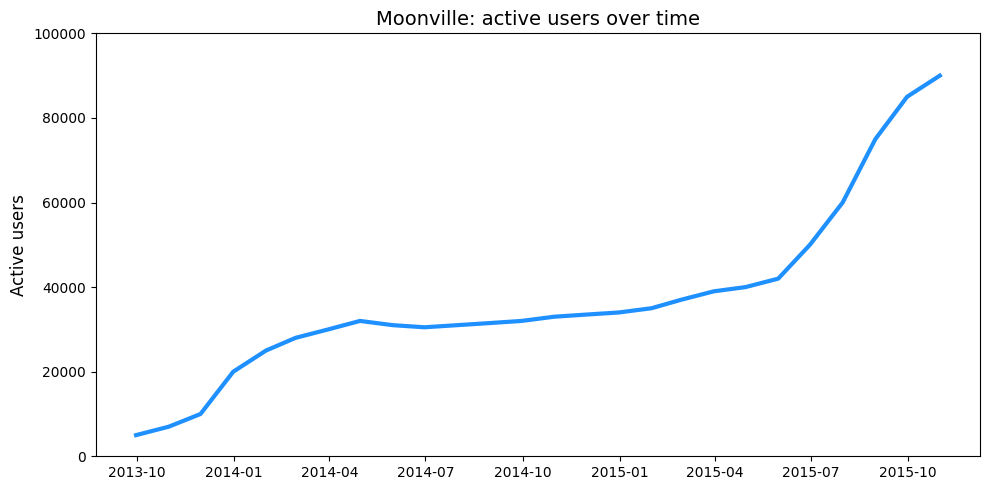

In [21]:
import matplotlib.pyplot as plt
import pandas as pd


months = pd.date_range(start="2013-09", periods=26, freq='M')  
active_users = [5000, 7000, 10000, 20000, 25000, 28000, 30000, 32000, 31000, 30500,
                31000, 31500, 32000, 33000, 33500, 34000, 35000, 37000, 39000, 40000,
                42000, 50000, 60000, 75000, 85000, 90000]

plt.figure(figsize=(10,5))
plt.plot(months, active_users, color='dodgerblue', linewidth=3)

plt.title("Moonville: active users over time", fontsize=14)
plt.ylabel("Active users", fontsize=12)

plt.ylim(0, 100000)

plt.tight_layout()
plt.show()
